<a href="https://colab.research.google.com/github/ManuWalls/Artificial_Intelligence-/blob/main/EDA_on_EKG_ManuelParedesS%C3%A1nchez_1953821.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis descriptivo de electrocardiogramas.

EL electrocardiograma es una de la tecnicas de registro de fenomenos bioelectricos mas caracteristicos dentro de la ingenieria biomedica. El trazo generado entrega informacion acerca del estado actual del corazon de un paciente. La medida fundamental a obtener de EKGs es la distancia entre ecada ciclo de bombeo del corazo, que a su vez esta delimitado por la precencia del complejo QRS, en donde R es el pico mas alto de un ciclo.

Mediante esta libreta, se obtendra la medicion de variables descriptivas del comportamiento de un trazo de EKG. Tres librerias seran fundamentales `numpy`, `scypy`, y `pandas`.

Para correr la libreta y hacer modificaciones, debera descargar la carpeta Raw_ECGs e incluirla en su espacio de trabajo. Alternativamente, puede modificar la ruta a su archivo segun sea conveniente.

**Importamos el archivo Raw_ECGs.zip**

In [1]:
!unzip Raw_ECGs.zip

Archive:  Raw_ECGs.zip
   creating: Raw_ECGs/
   creating: Raw_ECGs/Raw_Files/
  inflating: Raw_ECGs/Raw_Files/100m (8).mat  
  inflating: Raw_ECGs/Raw_Files/203m (1).mat  
  inflating: Raw_ECGs/Raw_Files/223m (7).mat  


**Importar librerias**

In [2]:
import numpy as np
import pandas as pd
import scipy.io as scy_io
from scipy.signal import butter,filtfilt,find_peaks
import matplotlib.pyplot as plt

**Cargar archivo EGK**

In [3]:
ekg_raw = scy_io.loadmat('Raw_ECGs/Raw_Files/100m (8).mat')['val'][0]

**Definir funciones auxiliares**

In [4]:
def butter_bandpass_filter(data, cutoff, fs, order=3):
    low_cutoff = cutoff[0] / (0.5 * fs)
    high_cutoff = cutoff[1] / (0.5 * fs)
    normal_cutoff = [low_cutoff, high_cutoff]
    b, a = butter(order, normal_cutoff, btype='bandpass', analog=False)
    y = filtfilt(b, a, data)
    return y

def encontrar_picos(ekg_raw,fc,fs,prom=.3,exp=2,mindist=10):
    ekg_filt = butter_bandpass_filter(ekg_raw,fc,fs)
    tiempo = np.linspace(0,len(ekg_filt)/fs,len(ekg_filt))
    ekg_norm = ekg_filt/ekg_filt.max()
    ekg_norm = ekg_norm**exp

    picos = find_peaks(ekg_norm,prominence=prom,distance=mindist)[0]

    picos_ampltd = ekg_norm[picos]
    picos_tiempo = tiempo[picos]

    plt.figure(figsize=(24,6))
    plt.plot(tiempo,ekg_norm)
    plt.scatter(picos_tiempo,picos_ampltd,color='r',s=15,marker='D')
    plt.title('EKG 100m')
    plt.ylabel('[mV]')
    plt.xlabel('[secs]')

    return tiempo, ekg_norm, picos_ampltd, picos_tiempo

# funcion de distribucion probabilistica
def fdp(mean,std):
    x = np.arange(mean-3*std, mean+4*std, std)
    y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))
    return x, y_out

**Detectar los picos del registro de EKG**

Distancia media:    0.8022430473111218
Desviacion estandar: 0.017696107391585534


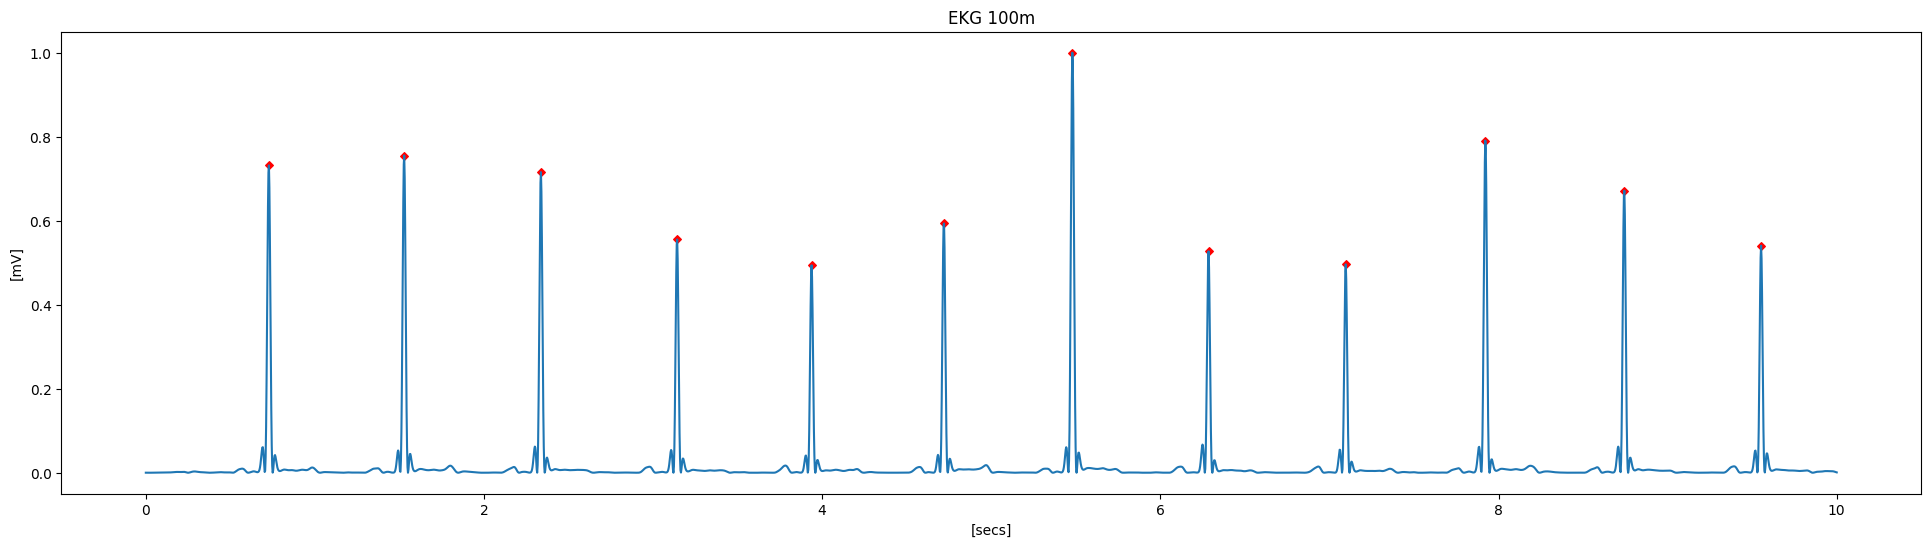

In [5]:
fs = 360
fc = [1, 20]
prom = .3
tiempo, ekg_norm,picos_ampltd,picos_tiempo = encontrar_picos(ekg_raw,fc,fs,prom)

distancias = np.diff(picos_tiempo)
media = np.mean(distancias)
std = np.std(distancias)

print('Distancia media:    {}'.format(media))
print('Desviacion estandar: {}'.format(std))

**Generar la distribucion probabilistica**

Nota: La funcion solo permite ajustar los valores a una distribucion normal.

DIstancias: 
	[0.75854404 0.78355099 0.79466518 0.80022228 0.80577938 0.80577938
 0.80855793 0.80855793 0.81133648 0.82245068 0.82522923]


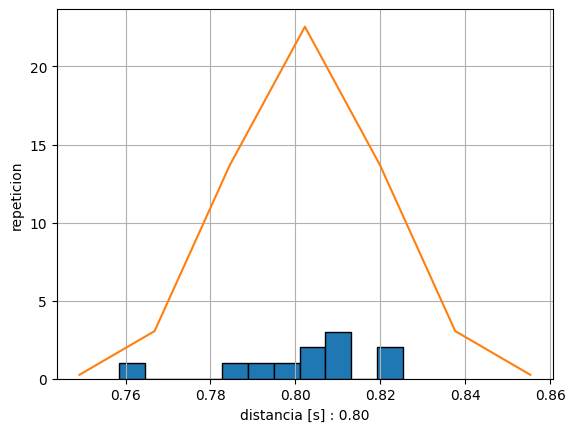

In [6]:
x, curva_gauss = fdp(media,std)

plt.hist(distancias,bins=len(distancias),edgecolor='black')
plt.plot(x,curva_gauss*1)
plt.grid('on')
plt.xlabel('distancia [s] : {:.2f}'.format(media))
plt.ylabel('repeticion')

distancias.sort()
print('DIstancias: \n\t{}'.format(distancias))

**Organizar valores encontrados para cada pico**

In [7]:
datos = pd.DataFrame({
    'tiempo[s]':picos_tiempo,
    'diff[s]':np.append(0,distancias),
    'amplitud':picos_ampltd
})
datos

,tiempo[s],diff[s],amplitud
0,0.727980,0.000000,0.731701
1,1.528202,0.758544,0.755256
2,2.336760,0.783551,0.715656
3,3.142540,0.794665,0.555365
4,3.937205,0.800222,0.493796
5,4.720756,0.805779,0.593484
6,5.479300,0.805779,1.000000
7,6.285079,0.808558,0.527074
8,7.096416,0.808558,0.496076
9,7.921645,0.811336,0.790903


##### Revision del segundo archivo `203 (1).mat`

Distancia media:    0.5303760848601736
Desviacion estandar: 0.1407877104104911
DIstancias: 
	[0.33342595 0.35565435 0.39733259 0.40288969 0.40844679 0.43345374
 0.44178939 0.45846068 0.46401778 0.57793832 0.58627396 0.61405946
 0.61405946 0.68074465 0.70297305 0.73353709 0.81133648]


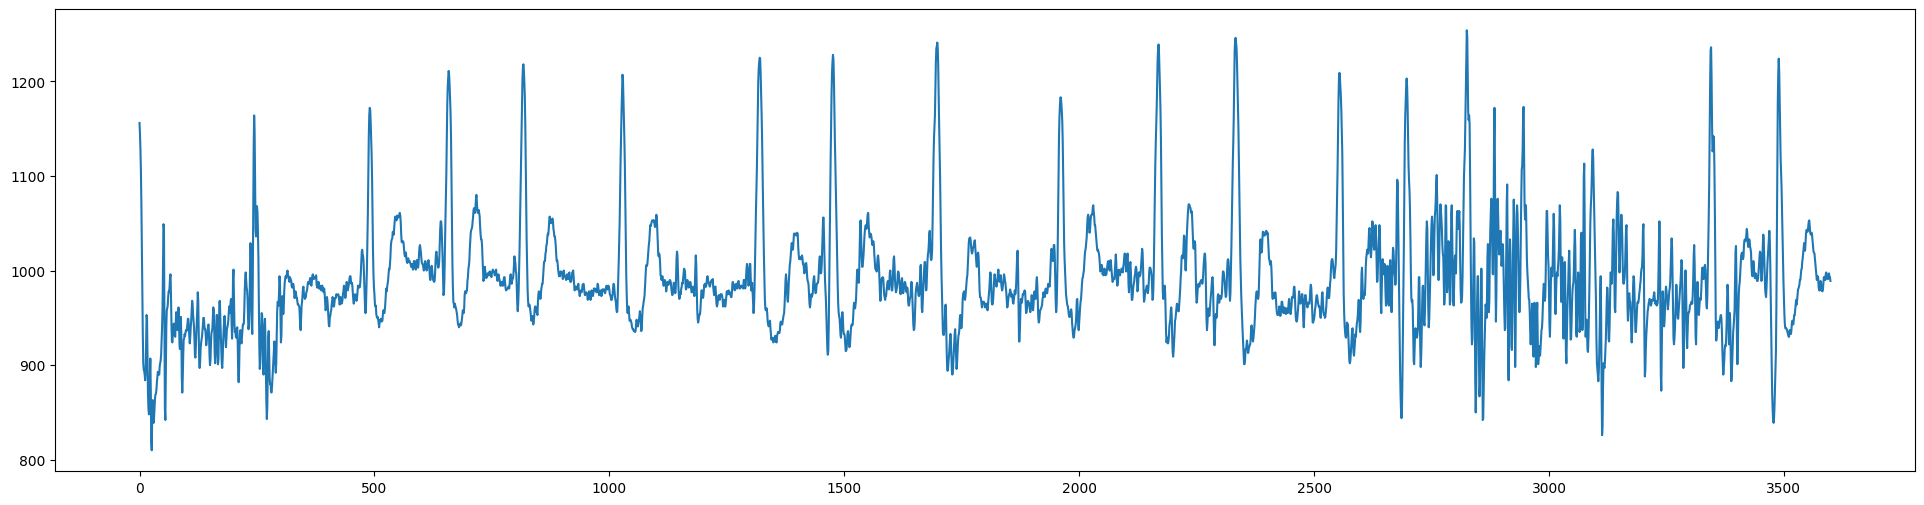

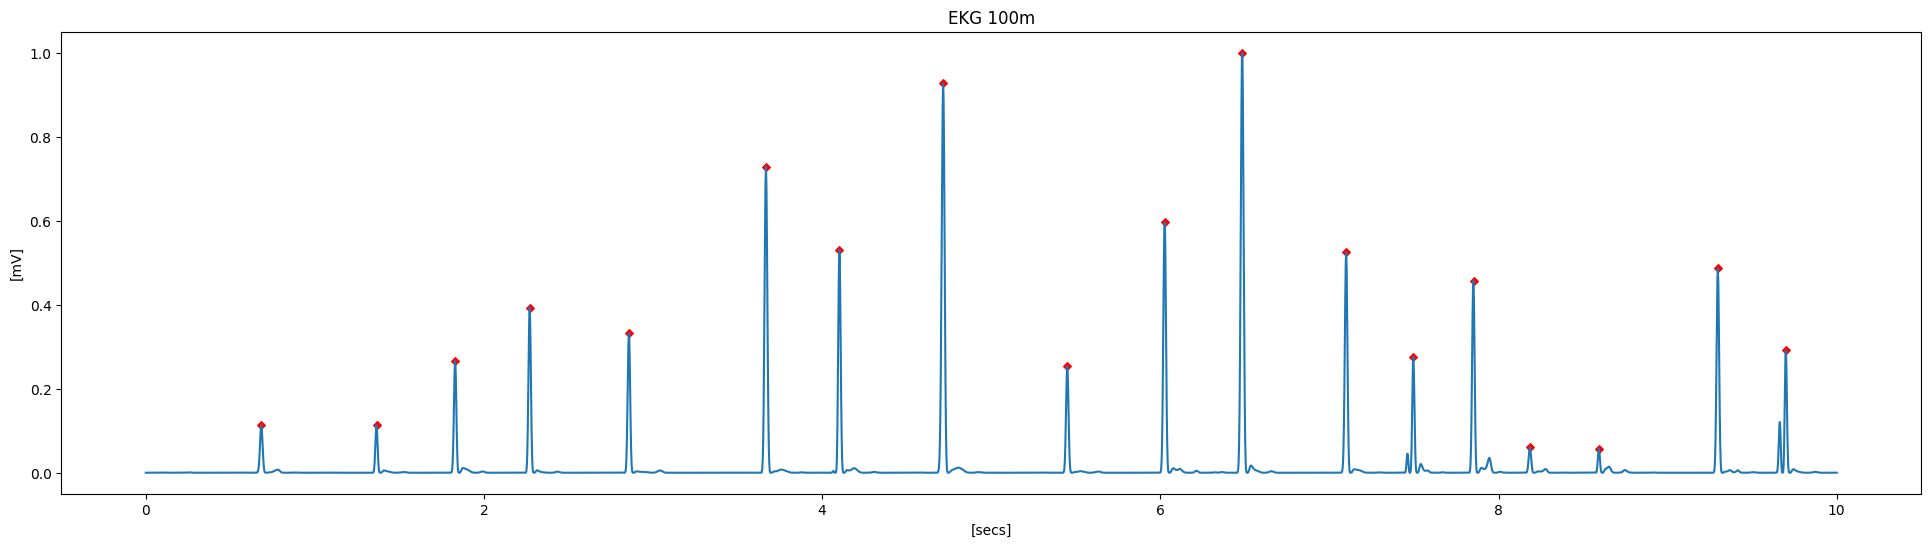

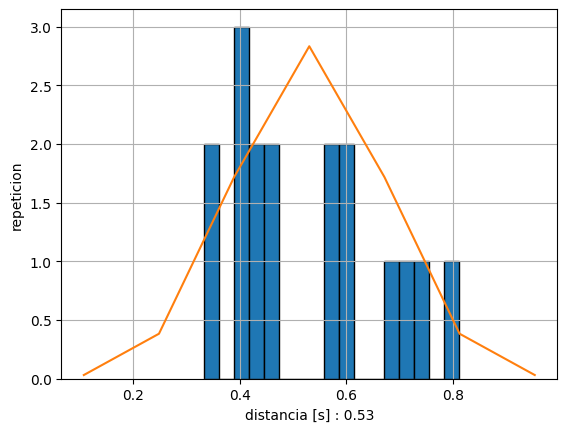

In [8]:
ekg_raw = scy_io.loadmat('Raw_ECGs/Raw_Files/203m (1).mat')['val'][0]

plt.figure(figsize=(24,6))
plt.plot(ekg_raw)

ekg_raw[:50] = ekg_raw.mean()

tiempo, ekg_norm,picos_ampltd,picos_tiempo = encontrar_picos(ekg_raw,fc,fs,.1/2,4,60)

distancias = np.diff(picos_tiempo)
media = np.mean(distancias)
std = np.std(distancias)

print('Distancia media:    {}'.format(media))
print('Desviacion estandar: {}'.format(std))

x, curva_gauss = fdp(media,std)

plt.figure()
plt.hist(distancias,bins=len(distancias),edgecolor='black')
plt.plot(x,curva_gauss*1)
plt.grid('on')
plt.xlabel('distancia [s] : {:.2f}'.format(media))
plt.ylabel('repeticion')

distancias.sort()
print('DIstancias: \n\t{}'.format(distancias))

##### Revision del segundo archivo `223 (7).mat`

Distancia media:    1.2019211685785736
Desviacion estandar: 0.03061297897774578
DIstancias: 
	[1.16143373 1.17254793 1.19199778 1.19199778 1.21144762 1.22534037
 1.25868297]


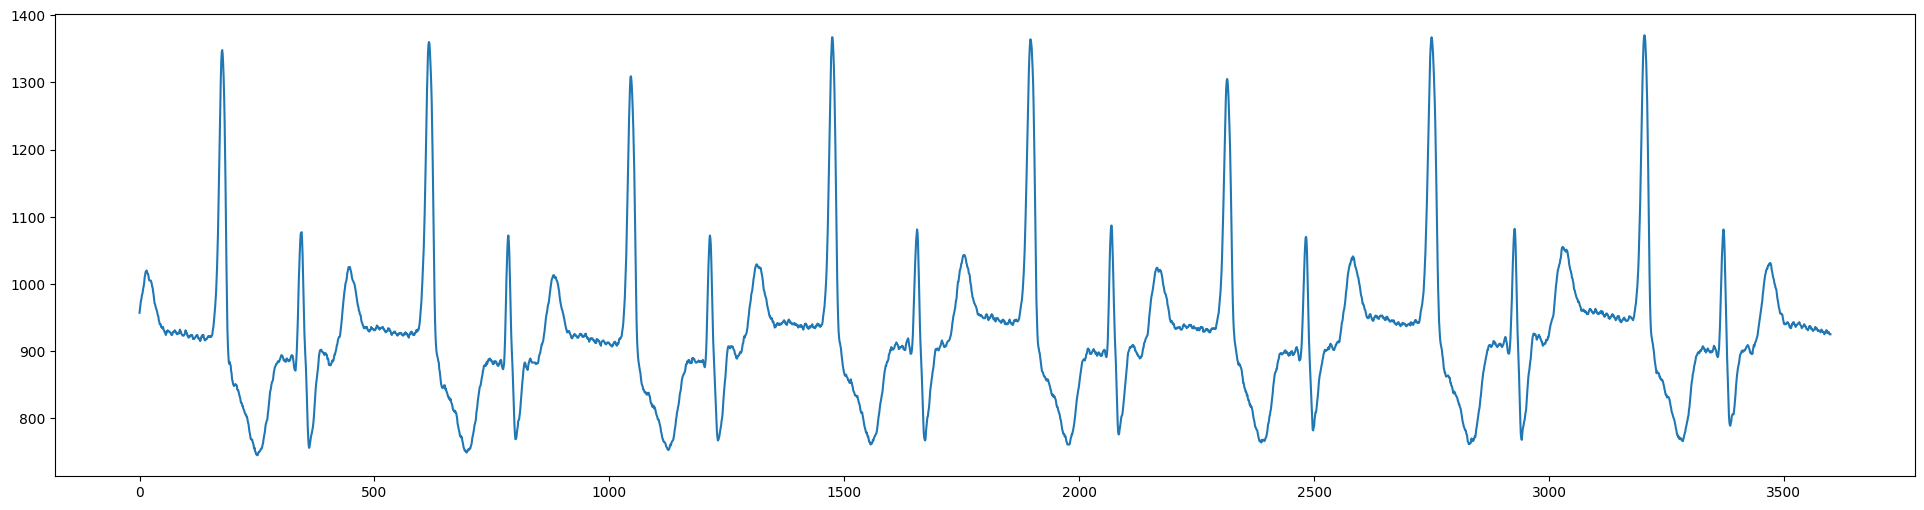

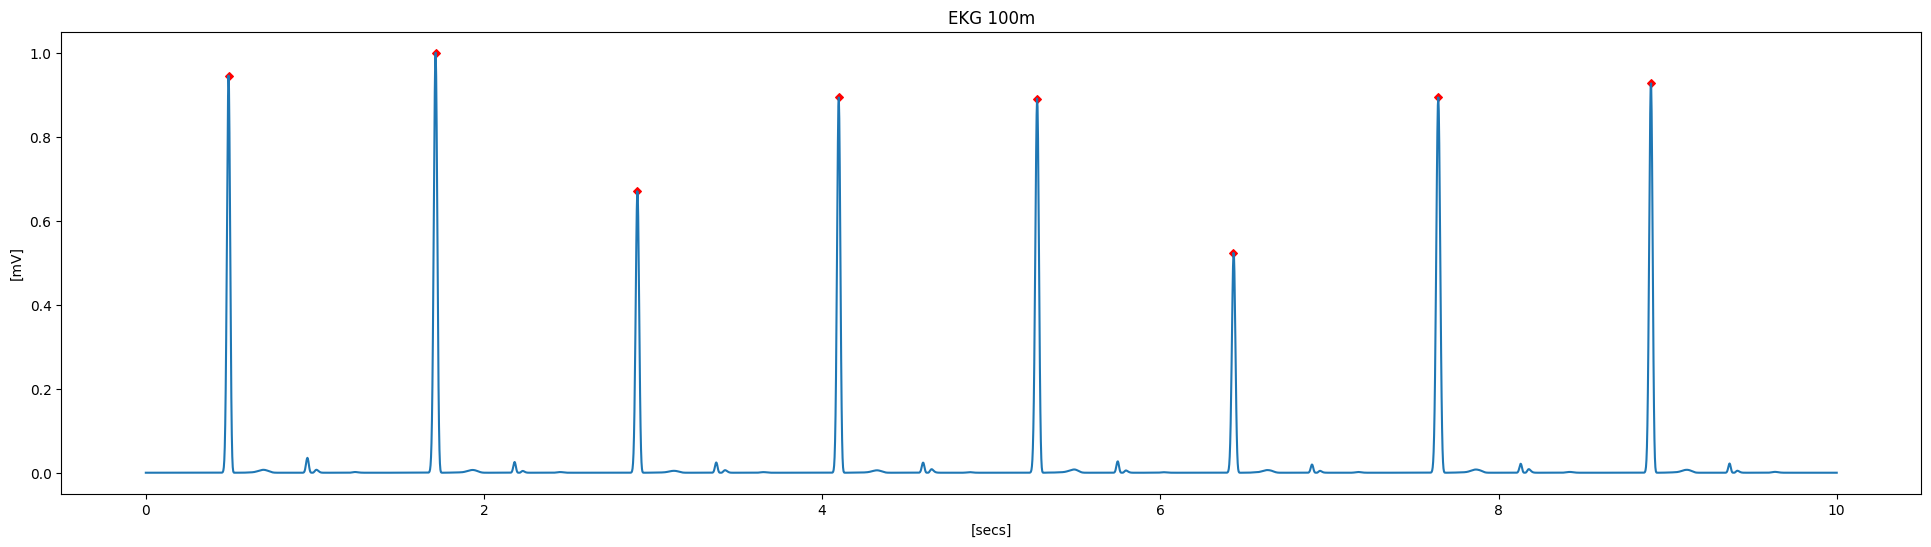

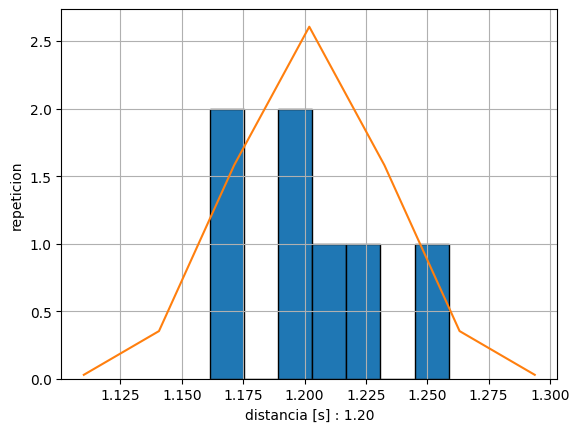

In [9]:
ekg_raw = scy_io.loadmat('Raw_ECGs/Raw_Files/223m (7).mat')['val'][0]

plt.figure(figsize=(24,6))
plt.plot(ekg_raw)

ekg_raw[:50] = ekg_raw.mean()

tiempo, ekg_norm,picos_ampltd,picos_tiempo = encontrar_picos(ekg_raw,fc,fs,.1/2,4,60)

distancias = np.diff(picos_tiempo)
media = np.mean(distancias)
std = np.std(distancias)

print('Distancia media:    {}'.format(media))
print('Desviacion estandar: {}'.format(std))

x, curva_gauss = fdp(media,std)

plt.figure()
plt.hist(distancias,bins=len(distancias),edgecolor='black')
plt.plot(x,curva_gauss*.2)
plt.grid('on')
plt.xlabel('distancia [s] : {:.2f}'.format(media))
plt.ylabel('repeticion')

distancias.sort()
print('DIstancias: \n\t{}'.format(distancias))